Insurance Fraud Detection

Ya Wang
021037801c
2023/01/15


In [1]:
!pip install plotly.express

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

loading the dataset

In [436]:
insuranceDf = pd.read_csv("D:/ds/ds/S3/insurance_project/insurance_claims.csv")

In [44]:
insuranceDf.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Data Processing

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(insuranceDf)

In [438]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

insuranceDf.replace('?', np.nan, inplace = True)

In [434]:
def get_missing_columns(df, top_N = 20):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  missing  = pd.concat([total, percent], axis=1, keys=['Total', 'MIssing Data Percent'])
  return missing.head(top_N)

In [439]:
print(get_missing_columns(insuranceDf))

                             Total  MIssing Data Percent
_c39                          1000                 100.0
property_damage                360                  36.0
police_report_available        343                  34.3
collision_type                 178                  17.8
bodily_injuries                  0                   0.0
incident_state                   0                   0.0
incident_city                    0                   0.0
incident_location                0                   0.0
incident_hour_of_the_day         0                   0.0
number_of_vehicles_involved      0                   0.0
fraud_reported                   0                   0.0
auto_year                        0                   0.0
auto_model                       0                   0.0
authorities_contacted            0                   0.0
total_claim_amount               0                   0.0
injury_claim                     0                   0.0
property_claim                 

In [45]:
to_drop = ['_c39']

insuranceDf.drop(to_drop, inplace = True, axis = 1)

In [46]:
print(get_missing_columns(insuranceDf)) # 缺失值记录数
insuranceDf[insuranceDf.duplicated()==True]#打印重复值

                             Total  Percent
months_as_customer               0      0.0
witnesses                        0      0.0
incident_state                   0      0.0
incident_city                    0      0.0
incident_location                0      0.0
incident_hour_of_the_day         0      0.0
number_of_vehicles_involved      0      0.0
property_damage                  0      0.0
bodily_injuries                  0      0.0
police_report_available          0      0.0
incident_severity                0      0.0
total_claim_amount               0      0.0
injury_claim                     0      0.0
property_claim                   0      0.0
vehicle_claim                    0      0.0
auto_make                        0      0.0
auto_model                       0      0.0
auto_year                        0      0.0
authorities_contacted            0      0.0
collision_type                   0      0.0


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported


Data Overiew - visulazation of the features

In [ ]:
Fraud_DF=insuranceDf.copy()
fraud_map = {'Y': 1, 'N': 0}
Fraud_DF['fraud_reported'] = Fraud_DF['fraud_reported'].map(fraud_map)

In [ ]:
def fea_per(df, fea):
    df = Fraud_DF.copy()
    df_age = df[[fea, 'fraud_reported']]
    sum=df_age.groupby(fea)['fraud_reported'].sum()
    count = df_age.groupby(fea).count()['fraud_reported']
    per = 100*(sum/count)
    return per


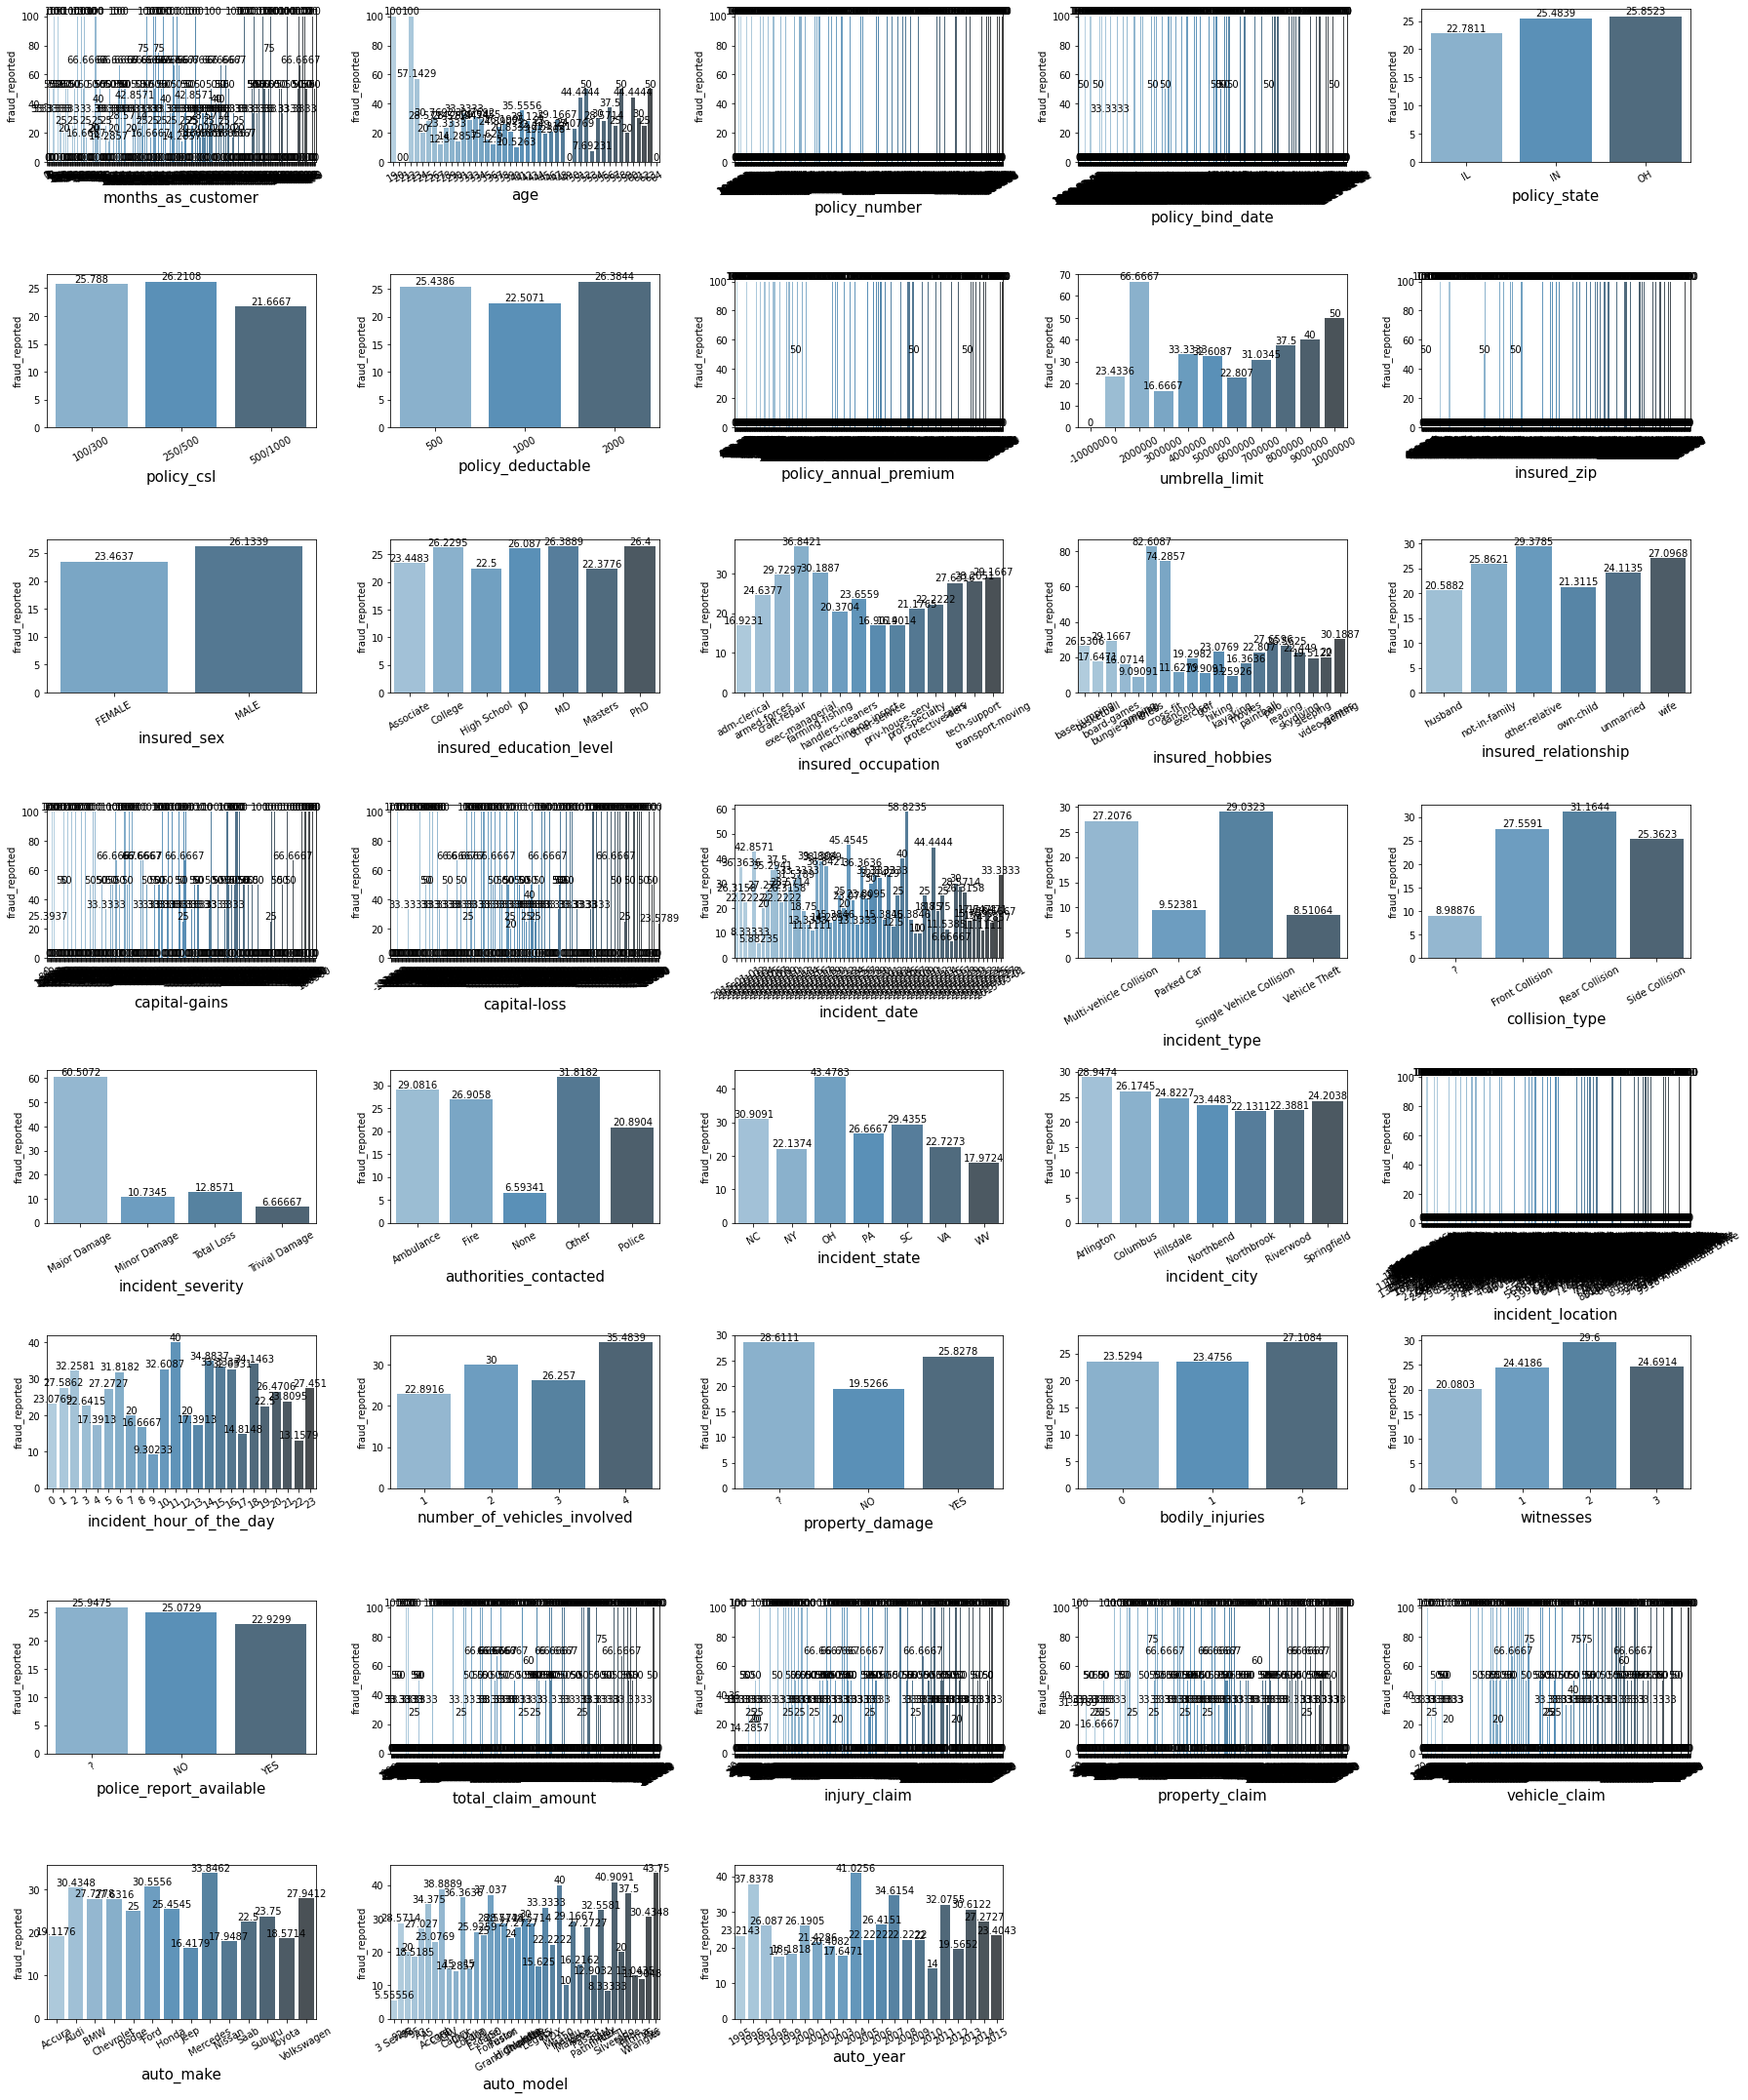

In [411]:
plt.figure(figsize = (25, 30))
plotnumber = 1
categorical_cols = Fraud_DF.drop(columns=['fraud_reported']).columns

for col in categorical_cols:
    Fea= fea_per(Fraud_DF,col)
    if plotnumber <= 40:
        ax = plt.subplot(8, 5, plotnumber)
        cat_plot = sns.barplot(x=Fea.index, y= Fea, alpha=0.9, palette="Blues_d")
        cat_plot.set_xticklabels(cat_plot.get_xticklabels(),rotation=30)
        ax.bar_label(ax.containers[0])
        plt.xlabel(col, fontsize = 15)       
    plotnumber += 1
    
plt.tight_layout()
plt.show()

In [406]:
def plot_pie_group(df, fea):
    df = df.set_index(fea)
    fig = px.pie(df,values=df.index,
                 color='fraud_reported',
                 barmode='group'
                )
    return fig

In [74]:
def plot_bar_group(df, fea):
    df = df.set_index(fea)
    fig = px.bar(df,y=df.index,
                 color='fraud_reported',
                 barmode='group'
                )
    return fig

In [79]:
fig = plot_bar_group(insuranceDf, 'insured_occupation')
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report numbers based on different occupation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [116]:
def plot_fea_per(df, fea):
    df = Fraud_DF.copy()
    df_fea = df[[fea, 'fraud_reported']]
    sum=df_fea.groupby(fea)['fraud_reported'].sum()
    count = df_fea.groupby(fea).count()['fraud_reported']
    per = 100*(sum/count)
    #print(per)

    fig = px.bar(per,x=per.index,
                y= per,
                color='fraud_reported',
                barmode='group',
                text = per
            ).update_traces(textposition="outside")
    return fig

In [100]:
fig = plot_fea_per(Fraud_DF,'insured_occupation')
fig.update_traces(textposition="outside")
fig.update_traces(width=0.5)
fig.update_layout(    title={
        'text': "Fraud report percentage based on different occupation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

insured_occupation
adm-clerical         16.923077
armed-forces         24.637681
craft-repair         29.729730
exec-managerial      36.842105
farming-fishing      30.188679
handlers-cleaners    20.370370
machine-op-inspct    23.655914
other-service        16.901408
priv-house-serv      16.901408
prof-specialty       21.176471
protective-serv      22.222222
sales                27.631579
tech-support         28.205128
transport-moving     29.166667
Name: fraud_reported, dtype: float64


In [81]:
fig = plot_bar_group(insuranceDf, 'insured_hobbies')
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report numbers based on different hobbies",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [82]:
fig = plot_fea_per(Fraud_DF,'insured_hobbies')
fig.update_traces(textposition="outside")
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report percentage based on different hobbies",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

insured_hobbies
base-jumping      26.530612
basketball        17.647059
board-games       29.166667
bungie-jumping    16.071429
camping            9.090909
chess             82.608696
cross-fit         74.285714
dancing           11.627907
exercise          19.298246
golf              10.909091
hiking            23.076923
kayaking           9.259259
movies            16.363636
paintball         22.807018
polo              27.659574
reading           26.562500
skydiving         22.448980
sleeping          19.512195
video-games       20.000000
yachting          30.188679
Name: fraud_reported, dtype: float64


In [427]:
fig = plot_bar_group(insuranceDf, 'incident_type')
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report distribution based on different incident_type",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [105]:
fig = plot_fea_per(Fraud_DF,'incident_type')
fig.update_traces(textposition="outside")
fig.update_traces(width=0.2)
fig.update_layout( title={
        'text': "Fraud report percentage based on incident type",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

incident_type
Multi-vehicle Collision     27.207637
Parked Car                   9.523810
Single Vehicle Collision    29.032258
Vehicle Theft                8.510638
Name: fraud_reported, dtype: float64


In [431]:
fig = plot_bar_group(insuranceDf, 'incident_severity')
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report distribution based on different incident severity",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [432]:
fig = plot_fea_per(Fraud_DF,'incident_severity')
fig.update_traces(textposition="outside")
fig.update_traces(width=0.2)
fig.update_layout( title={
        'text': "Fraud report percentage based on number of incident severity",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [113]:
categorical_cols = Fraud_DF.select_dtypes(exclude='number').columns
print (categorical_cols )

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')


In [87]:

fig = px.bar(insuranceDf,y =insuranceDf.index,
                x = 'age',
                color='fraud_reported',
                barmode='group'
            )
fig.update_traces(textposition="outside")
fig.update_layout(    title={
        'text': "Fraud report distribute based on age",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [130]:
# 2、将年龄划分不同时间段
df = insuranceDf.copy()
df_age = df[['age', 'fraud_reported']]

age_bin = [0, 20, 30,40, 50, 60, 100]
df_age['layered'] = pd.cut(x=df_age['age'], bins=age_bin)
# 3、将age划分对应区间
df_age = df_age.groupby(['layered']).agg({'fraud_reported': 'sum', 'age': 'count'})

# 4、计算男女占比情况
df_age = df_age.assign(
    fraud_rate=df_age['fraud_reported'] / df_age['age'],
    Real_rate=1 - df_age['fraud_reported'] / df_age['age']
)
# 5、输出结果
print(df_age)


           fraud_reported  age  fraud_rate  Real_rate
layered                                              
(0, 20]                 1    2    0.500000   0.500000
(20, 30]               45  195    0.230769   0.769231
(30, 40]               94  396    0.237374   0.762626
(40, 50]               72  293    0.245734   0.754266
(50, 60]               30   96    0.312500   0.687500
(60, 100]               5   18    0.277778   0.722222


Filling the missing data

In [144]:
Df_process = Fraud_DF.copy()

In [145]:
def fill_missing(df):
  categorical_cols = df.select_dtypes(exclude='number').columns
  numerical_cols = df.select_dtypes(include='number').columns
  for cat in categorical_cols:
    if df[cat].isna().sum()>0:
      df[cat] = df[cat].fillna('MISSING')

  df[numerical_cols] = df[numerical_cols].fillna(insuranceDf[numerical_cols].median())

  return df

In [146]:
fill_missing(Df_process)
print(get_missing_columns(Df_process)) # 缺失值记录数

                             Total  Percent
months_as_customer               0      0.0
witnesses                        0      0.0
incident_state                   0      0.0
incident_city                    0      0.0
incident_location                0      0.0
incident_hour_of_the_day         0      0.0
number_of_vehicles_involved      0      0.0
property_damage                  0      0.0
bodily_injuries                  0      0.0
police_report_available          0      0.0
incident_severity                0      0.0
total_claim_amount               0      0.0
injury_claim                     0      0.0
property_claim                   0      0.0
vehicle_claim                    0      0.0
auto_make                        0      0.0
auto_model                       0      0.0
auto_year                        0      0.0
authorities_contacted            0      0.0
collision_type                   0      0.0


In [157]:
import datetime  # split the date data to year, month and day
df = Df_process.copy()
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date_year']=df['policy_bind_date'].dt.year.astype('int64')
df['policy_bind_date_month']=df['policy_bind_date'].dt.month.astype('int64')
df['policy_bind_date_day']=df['policy_bind_date'].dt.day.astype('int64')
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_date_year']=df['incident_date'].dt.year.astype('int64')
df['incident_date_month']=df['incident_date'].dt.month.astype('int64')
df['incident_date_day']=df['incident_date'].dt.day.astype('int64')
df['auto_year']=df['auto_year'].astype('int64')
#####################################
X_data=df.drop(columns=['policy_state', 'police_report_available','policy_number','policy_bind_date','incident_date','fraud_reported','incident_location'])
Y_data=df['fraud_reported']

<AxesSubplot:>

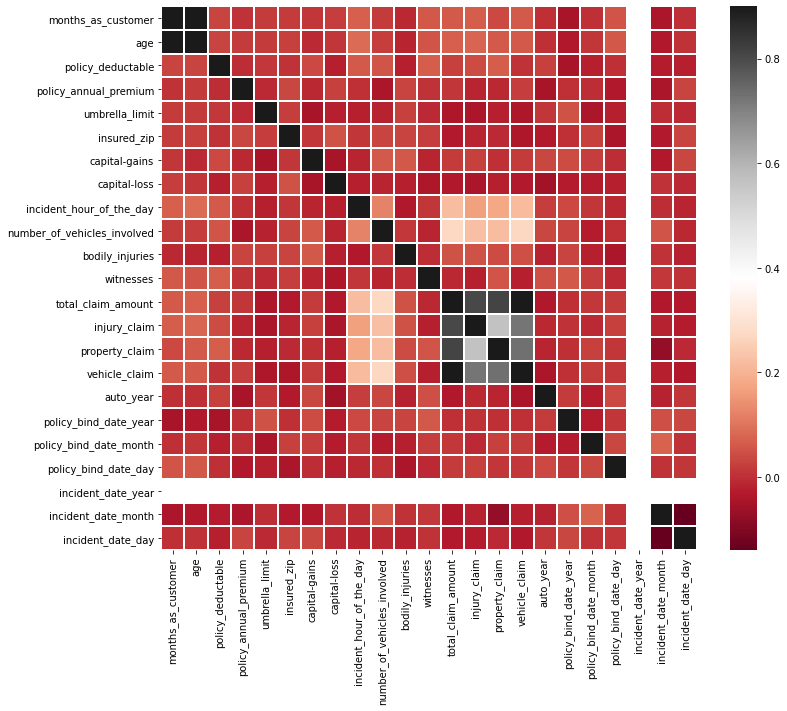

In [158]:
#remove the collinear features of the dataset
#We select the threshold of 90% that gives an initial correlated features. 
correlation_matrix=X_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,vmax=0.9,linewidths=0.05,cmap="RdGy")

In [159]:

X_uncorrelated = X_data.copy()

def get_correlated(df, correlation_threshold=0.9):
  correlations = df.corr(method='pearson')
  corrs = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))

  corrs = corrs.stack().reset_index()
  corrs.columns = ['Row','Column','Value']
  return corrs[(corrs["Value"]>correlation_threshold) & (corrs["Value"]<1)].sort_values(by="Value",ascending=False)

In [160]:
high_corr = get_correlated(X_uncorrelated)
while(len(high_corr)>0):
  column_to_drop = high_corr["Row"].values[0]
  print("dropping feature",column_to_drop)
  X_uncorrelated = X_uncorrelated.drop(column_to_drop, axis=1)
  high_corr = get_correlated(X_uncorrelated)

dropping feature total_claim_amount
dropping feature months_as_customer


Class inbalance

0    753
1    247
Name: fraud_reported, dtype: int64


<AxesSubplot:ylabel='Frequency'>

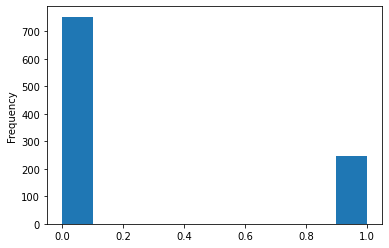

In [433]:
print(Df_process['fraud_reported'].value_counts())

Df_process['fraud_reported'].plot.hist()

Categorical features process

In [161]:
cat_df = X_uncorrelated.select_dtypes(exclude='number')
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_hobbies: 
['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' '?' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Da

## We will use one hot encoding with categories

In [162]:
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [163]:
cat_df.head()

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [183]:
# Scale the numeric values in the dataset
num_df = X_uncorrelated.select_dtypes(include = 'number')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [185]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_uncorrelated.index)
scaled_num_df.head()

,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,...,injury_claim,property_claim,vehicle_claim,auto_year,policy_bind_date_year,policy_bind_date_month,policy_bind_date_day,incident_date_year,incident_date_month,incident_date_day
0,0.990836,-0.222383,0.616705,-0.479476,-0.489529,1.011331,0.953851,-0.956261,-0.823865,0.009759,...,-0.189283,1.165505,0.749653,-0.183440,1.684992,0.983684,0.176292,0.0,-0.947587,1.154424
1,0.334073,1.412784,-0.242521,1.697980,-0.461008,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,...,-1.363822,-1.372696,-1.823346,0.315491,0.597550,-0.159802,1.312191,0.0,-0.947587,0.692885
2,-1.088913,1.412784,0.642233,1.697980,-0.984885,0.358023,0.953851,-0.668404,1.140056,1.229693,...,0.054644,-0.736072,-0.785565,0.315491,-0.218032,0.697813,-1.073198,0.0,0.962871,0.808270
3,0.224613,1.412784,0.652886,2.133471,1.491682,0.853388,-1.267577,-0.956261,-0.823865,0.009759,...,-0.224130,-0.219722,0.677607,1.479664,-1.577335,-0.445674,1.085011,0.0,-0.947587,-0.576347
4,0.552994,-0.222383,1.341980,2.133471,1.527808,1.467210,-0.683741,1.202666,-0.823865,-1.210174,...,-1.257232,-1.399654,-1.768252,0.648112,1.684992,-0.159802,-1.073198,0.0,0.962871,0.231346


In [187]:
X_pro= pd.concat([scaled_num_df, cat_df], axis = 1)

Feature distribution

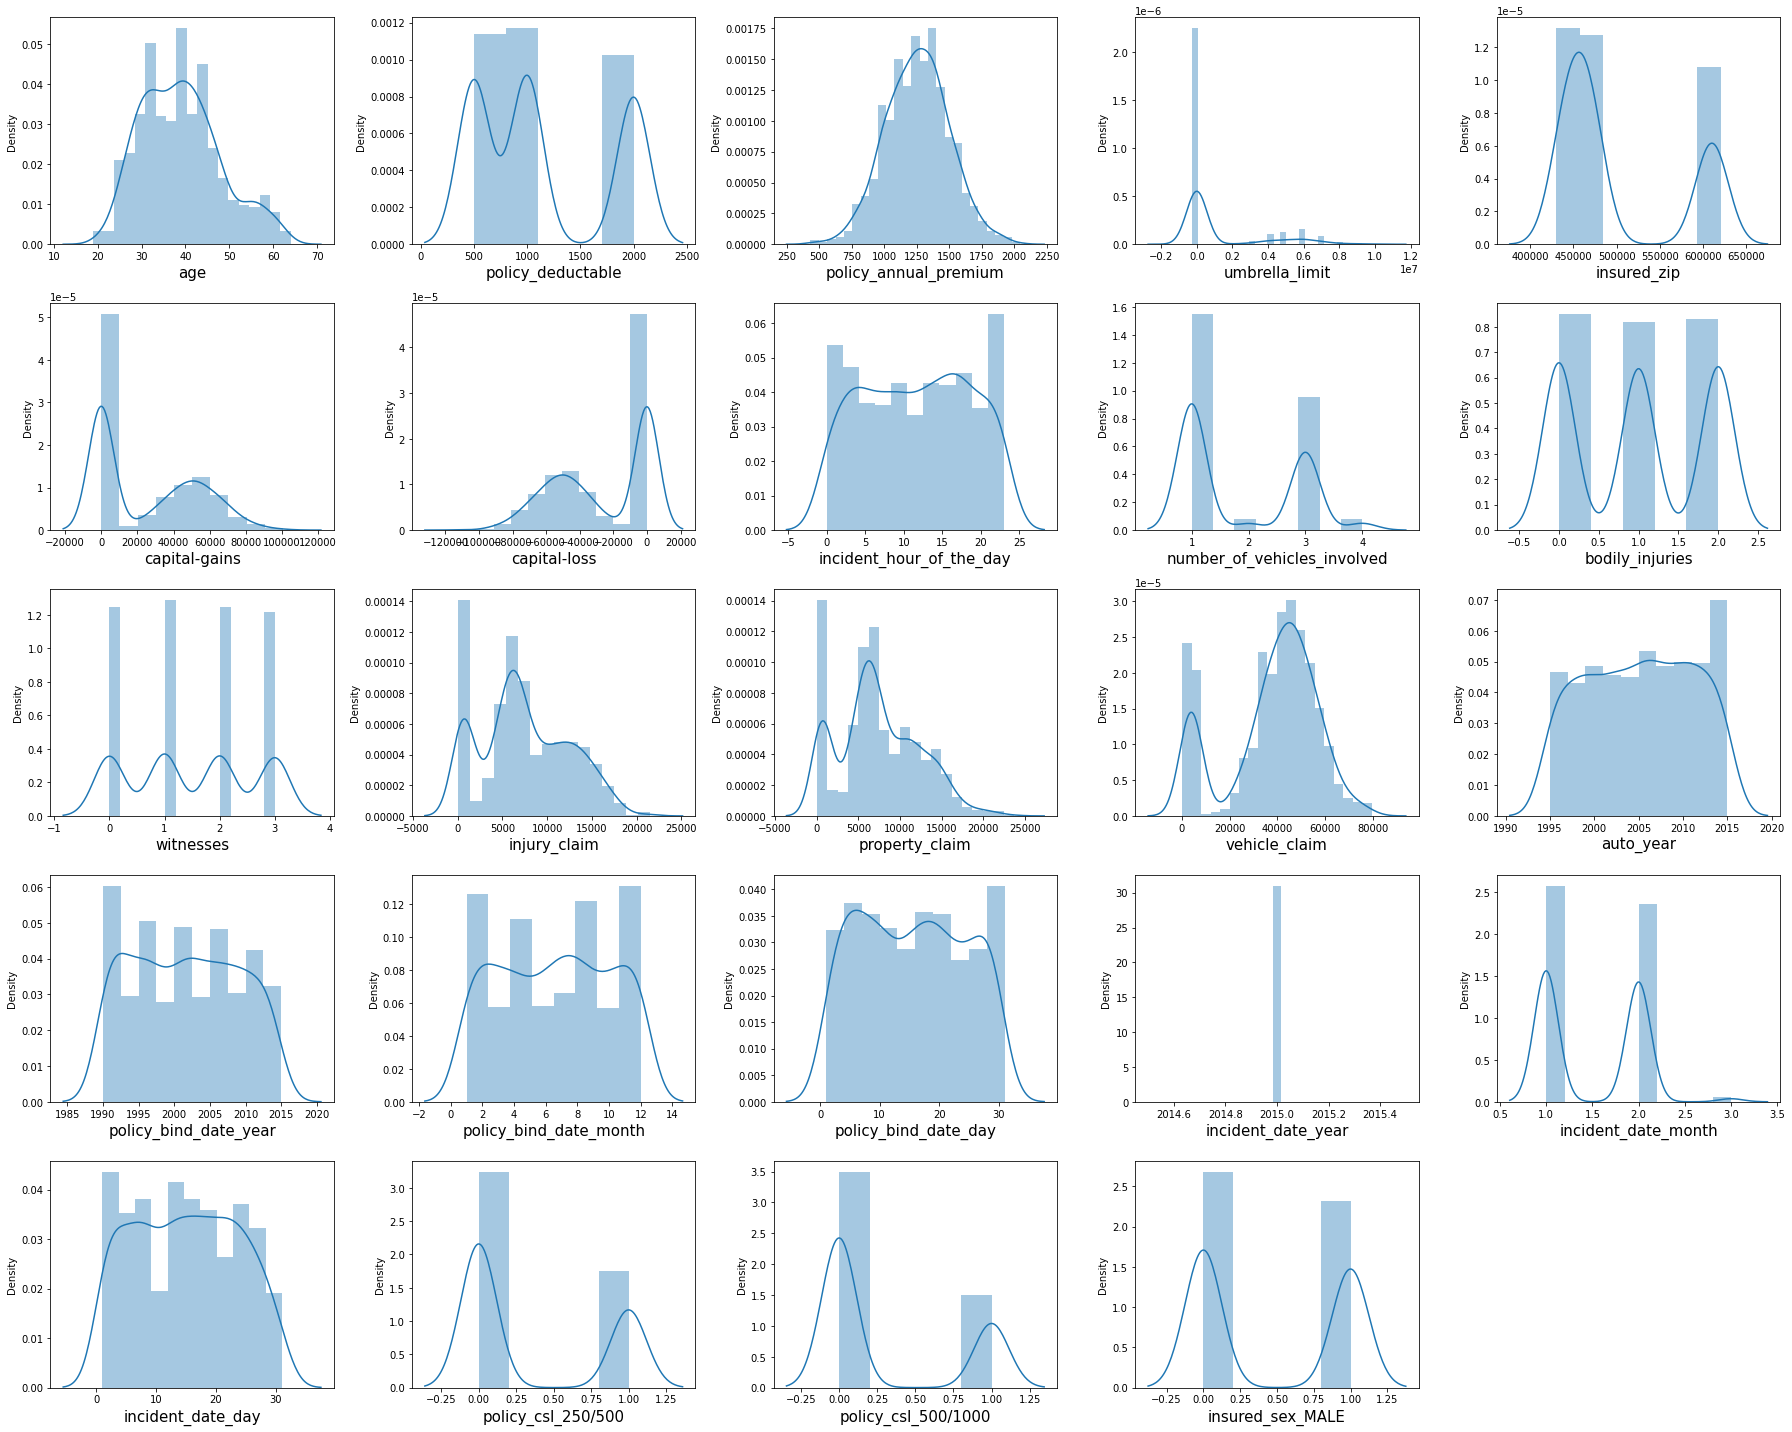

In [166]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X_pro.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(Df_pro[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Outliers Detection

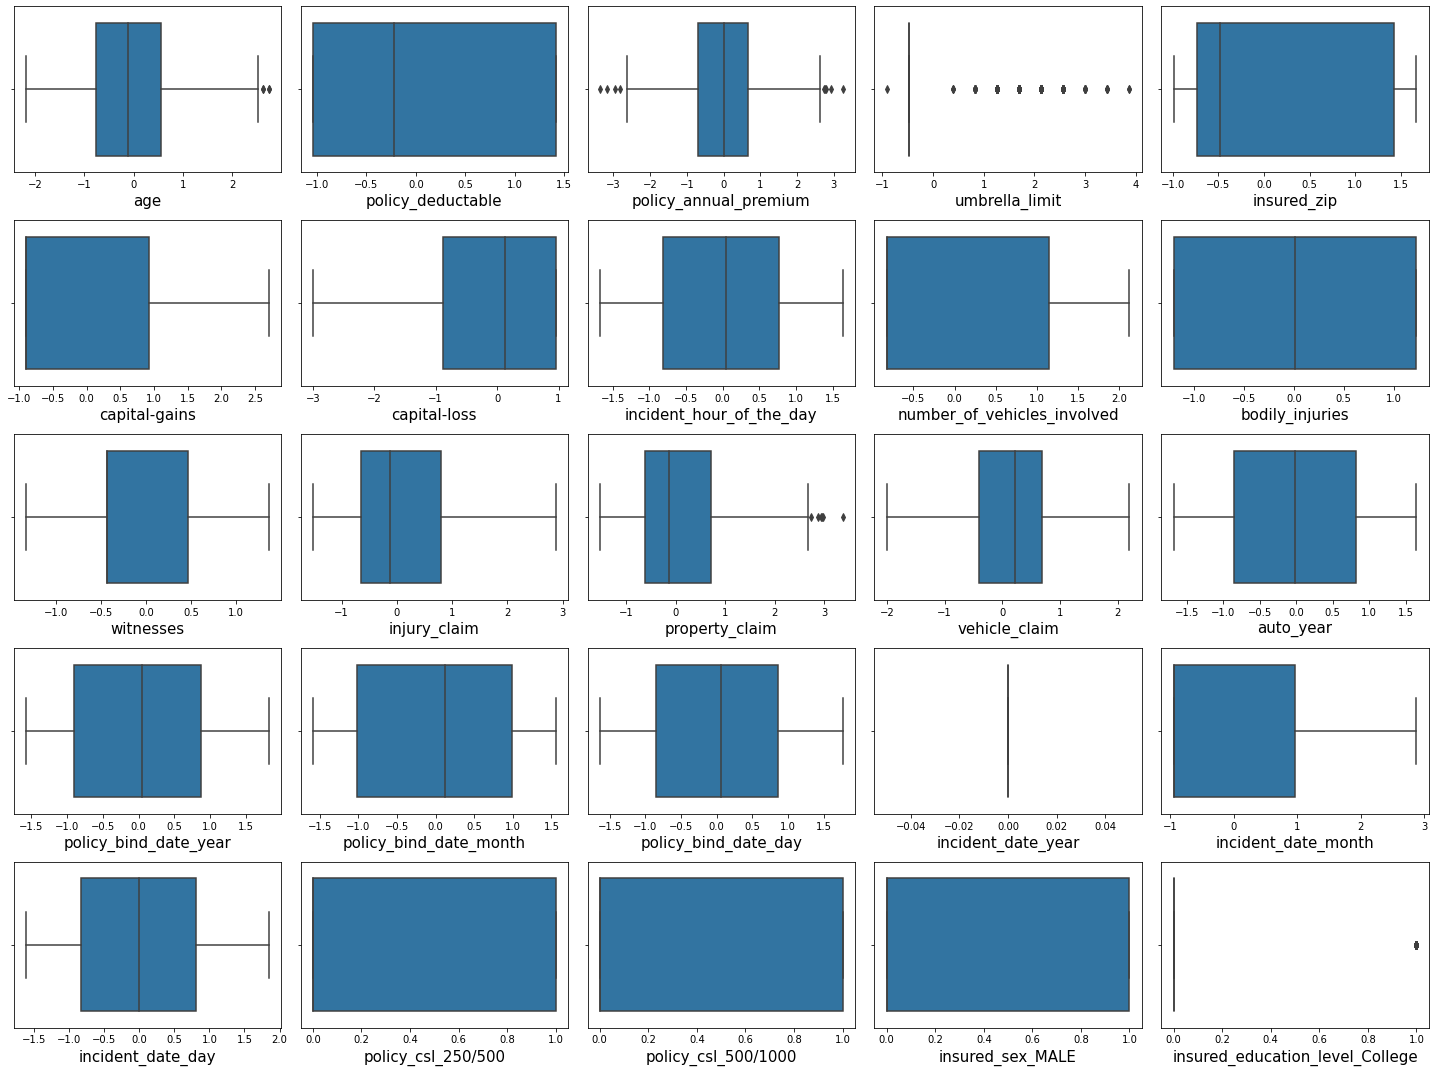

In [335]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X_pro.columns:
    if plotnumber <= 25:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X_pro[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

In [189]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pro, Y_data, test_size = 0.25)

Models

SVC

In [374]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.8946666666666667
Test accuracy of Support Vector Classifier is : 0.788
[[195   0]
 [ 53   2]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       195
           1       1.00      0.04      0.07        55

    accuracy                           0.79       250
   macro avg       0.89      0.52      0.48       250
weighted avg       0.83      0.79      0.70       250



In [375]:
# AUC report
from sklearn import metrics
auc_SVC = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_SVC, true_positive_rate_SVC, _ = metrics.roc_curve(y_test, y_pred)

In [376]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7426666666666667
Test accuracy of KNN is : 0.784
[[195   0]
 [ 54   1]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       195
           1       1.00      0.02      0.04        55

    accuracy                           0.78       250
   macro avg       0.89      0.51      0.46       250
weighted avg       0.83      0.78      0.69       250



In [377]:
# AUC report
auc_KNN = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_KNN, true_positive_rate_KNN, _ = metrics.roc_curve(y_test, y_pred)

Decision Tree Classifier

In [378]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.792
[[160  35]
 [ 17  38]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       195
           1       0.52      0.69      0.59        55

    accuracy                           0.79       250
   macro avg       0.71      0.76      0.73       250
weighted avg       0.82      0.79      0.80       250



In [379]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 9}
0.844


In [384]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8733333333333333
Test accuracy of Decision Tree is : 0.864
[[175  20]
 [ 14  41]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       195
           1       0.67      0.75      0.71        55

    accuracy                           0.86       250
   macro avg       0.80      0.82      0.81       250
weighted avg       0.87      0.86      0.87       250



In [385]:
# AUC report
auc_DT = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_DT, true_positive_rate_DT, _ = metrics.roc_curve(y_test, y_pred)

Random Forest Classifier

In [386]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9453333333333334
Test accuracy of Random Forest is : 0.784
[[193   2]
 [ 52   3]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       195
           1       0.60      0.05      0.10        55

    accuracy                           0.78       250
   macro avg       0.69      0.52      0.49       250
weighted avg       0.75      0.78      0.71       250



In [398]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, make_scorer
# define search space
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}
space = dict()
space['max_depth'] = range(1, 11)
space['n_estimators'] = range(10, 100, 10)

# define model
model = RandomForestClassifier(random_state=42)

# define search
search = GridSearchCV(model, space, scoring=scoring, refit='AUC')
# execute search
re_GS = search.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % re_GS.best_score_)
print('Best Hyperparameters: %s' % re_GS.best_params_)

Best Score: 0.8562138410822622
Best Hyperparameters: {'max_depth': 3, 'n_estimators': 90}


In [388]:
# Best Hyperparameters
max_depth = re_GS.best_params_['max_depth'] 
n_estimators = re_GS.best_params_['n_estimators'] 

# define optimal model
RF = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=123)

In [389]:
#RF = grid_search.best_estimator_
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

RF_train_acc = accuracy_score(y_train, RF.predict(X_train))
RF_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {RF_train_acc}")
print(f"Test accuracy of Random Forest is : {RF_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.744
Test accuracy of Random Forest is : 0.78
[[195   0]
 [ 55   0]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       195
           1       0.00      0.00      0.00        55

    accuracy                           0.78       250
   macro avg       0.39      0.50      0.44       250
weighted avg       0.61      0.78      0.68       250



In [390]:
# AUC report
from sklearn import metrics
auc_RF = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_RF, true_positive_rate_RF, _ = metrics.roc_curve(y_test, y_pred)

CatBoostClassifier


In [391]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

col=Ca_feature
clf=CatBoostClassifier() 
clf.fit(X_train,y_train,verbose=500,cat_features=col)
y_pred=clf.predict_proba(X_test)[:,1]
print(' test auc:{}'.format(roc_auc_score(y_test, y_pred)))

cat_acc = accuracy_score(y_test, clf.predict(X_test))
print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, clf.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")


Learning rate set to 0.009111
0:	learn: 0.6896585	total: 14ms	remaining: 14s
500:	learn: 0.2380066	total: 4.98s	remaining: 4.96s
999:	learn: 0.1334381	total: 9.21s	remaining: 0us
 test auc:0.8805594405594405
Training Accuracy of Cat Boost Classifier is 0.9866666666666667
Test Accuracy of Cat Boost Classifier is 0.836 

Confusion Matrix :- 
[[182  13]
 [ 28  27]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       195
           1       0.63      0.44      0.52        55

    accuracy                           0.82       250
   macro avg       0.74      0.68      0.70       250
weighted avg       0.80      0.82      0.81       250



In [392]:
# AUC report
auc_CAT = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_CAT, true_positive_rate_CAT, _ = metrics.roc_curve(y_test, y_pred)

XGBOOST

In [393]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# accuracy_score, confusion_matrix and classification_report

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.828
[[173  22]
 [ 21  34]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       195
           1       0.61      0.62      0.61        55

    accuracy                           0.83       250
   macro avg       0.75      0.75      0.75       250
weighted avg       0.83      0.83      0.83       250



In [394]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)
grid_search.fit(X_train, y_train)
# best estimator 
best_est = grid_search.best_estimator_
print(best_est)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=9)


In [395]:
# accuracy_score, confusion_matrix and classification_report
xgb_best = XGBClassifier(max_depth=5, min_samples_leaf=3)
xgb_best.fit(X_train, y_train)
y_pred = best_est.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XgBoost is : {xgb_train_acc}")
print(f"Test accuracy of XgBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[20:35:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

Training accuracy of XgBoost is : 1.0
Test accuracy of XgBoost is : 0.856
[[175  20]
 [ 16  39]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       195
           1       0.66      0.71      0.68        55

    accuracy                           0.86       250
   macro avg       0.79      0.80      0.80       250
weighted avg       0.86      0.86      0.86       250



In [396]:
# AUC report
auc_XGB = metrics.roc_auc_score(y_test, y_pred)
false_positive_rate_XGB, true_positive_rate_XGB, _ = metrics.roc_curve(y_test, y_pred)

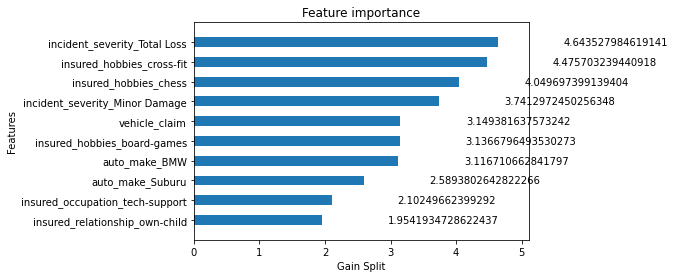

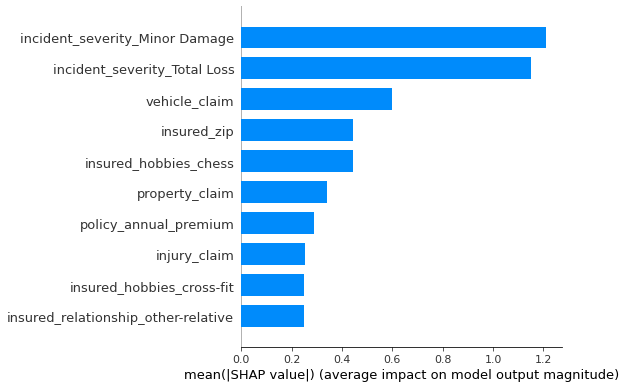

In [350]:
from xgboost import plot_importance
plot_importance(xgb_best,height=0.5,importance_type='gain',max_num_features=10,xlabel='Gain Split',grid=False) 
plt.show()  
import shap 
explainer = shap.TreeExplainer(xgb_best)
shap_values = explainer.shap_values(X_pro)
shap.summary_plot(shap_values, X_pro, plot_type="bar",max_display = 10)

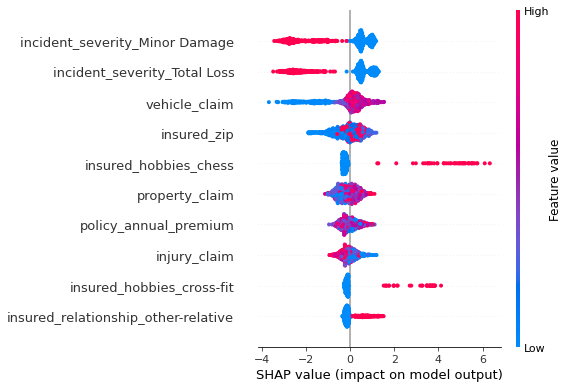

In [352]:
shap.summary_plot(shap_values, X_pro ,max_display = 10)

In [240]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest','Cat Boost', 'XgBoost', ],
    'Score' : [svc_test_acc, knn_test_acc, dtc_test_acc, rand_clf_test_acc,  cat_acc,  xgb_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,Decision Tree,0.864
5,XgBoost,0.856
4,Cat Boost,0.836
0,SVC,0.788
3,Random Forest,0.788
1,KNN,0.784


In [259]:
import plotly.graph_objects as go
fig = px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')
fig.show()     

from kaleido.scopes.plotly import PlotlyScope
import plotly.graph_objects as go
scope = PlotlyScope()

Fig = go.Figure(fig)
with open("D:/ds/ds/S3/insurance_project/image/models_comparison_onehot.png", "wb") as f:
    f.write(scope.transform(Fig, format="png"))

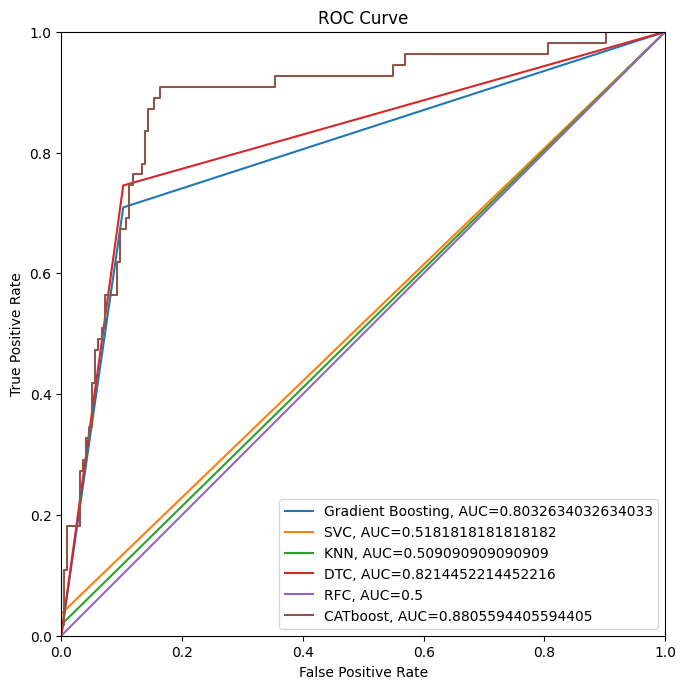

In [397]:
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("ROC Curve")

plt.plot(false_positive_rate_XGB,true_positive_rate_XGB,label="Gradient Boosting, AUC="+str(auc_XGB))
plt.plot(false_positive_rate_SVC,true_positive_rate_SVC,label="SVC, AUC="+str(auc_SVC))
plt.plot(false_positive_rate_KNN,true_positive_rate_KNN,label="KNN, AUC="+str(auc_KNN))
plt.plot(false_positive_rate_DT,true_positive_rate_DT,label="DTC, AUC="+str(auc_DT))
plt.plot(false_positive_rate_RF,true_positive_rate_RF,label="RFC, AUC="+str(auc_RF))
plt.plot(false_positive_rate_CAT,true_positive_rate_CAT,label="CATboost, AUC="+str(auc_CAT))

plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()